In [1]:
%load_ext autoreload

In [47]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [48]:
config.test(end_rs=2000, iter=2, std_only=True)
# config.test()

Running main.evolve(...): 
******************************************
Testing solution with no DM: 
****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


  0%|          | 0/26.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)
/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/low_energy/atomic.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-E/Tr) / (1 - np.exp(-E/Tr))
/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/low_energy/atomic.py:146: RuntimeWarning: overflow encountered in multiply
  x_2s * (1 + f_gamma(engs)) * (1 + f_gamma(phys.lya_eng - engs)) -
/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:903: RuntimeWarning: invalid 

  0%|          | 0/26.0 [00:00<?, ?it/s]

The maximum relative change in xHI and xHeI is:  0.0
The maximum relative change in Tm is:  0.0
The maximum relative change in f_(H ion) is:  0.0
The maximum relative change in f_(H ion) is:  0.0
The maximum relative change in f_(He ion) is:  0.0
The maximum relative change in f_(Lya) is:  0.0
The maximum relative change in f_(heat) is:  0.0
The maximum relative change in f_(cont) is:  0.0
The maximum relative change in the MLA parameters is:  4.989781529112791e+282
Pickled solution with no DM!
Test complete!


In [ ]:
test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/std_test_data.p', 'rb'))

ref_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220818_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6.p', 'rb'))

In [ ]:
print(test_data['MLA'][1:])
print(ref_data['MLA'][1:])

In [8]:
options_dict = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e25,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'iterations':2
}

options_dict_std = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e40,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':2000,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':100, 'rtol':1e-6, 'use_tqdm':True, 'iterations':2
}

In [9]:
%%prun 
# res = main.evolve(**options_dict)
res_std = main.evolve(**options_dict_std)

  0%|          | 0/26.0 [00:00<?, ?it/s]

  0%|          | 0/26.0 [00:00<?, ?it/s]

         27357081 function calls (27304870 primitive calls) in 106.486 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       52   23.724    0.456   82.659    1.590 atomic.py:567(process_MLA)
       52   12.767    0.246   28.307    0.544 atomic.py:226(populate_bound_bound)
       52    7.537    0.145    7.537    0.145 {method 'nonzero' of 'numpy.ndarray' objects}
      156    6.461    0.041    6.461    0.041 {built-in method scipy.sparse.linalg.dsolve._superlu.gssv}
        2    3.913    1.957    7.456    3.728 atomic.py:189(populate_radial)
  1940400    3.314    0.000    3.314    0.000 atomic.py:163(Hey_A)
1609189/1575889    3.221    0.000   12.618    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     5200    2.697    0.001    3.860    0.001 bound_free.py:810(net_spec_n)
   585888    2.663    0.000    2.663    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      850    1.989    0.002    1.

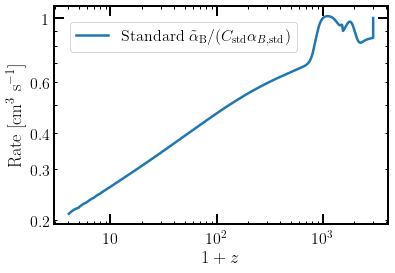

In [9]:
plt.figure()

plt.loglog()

res_rs = res[-1]['MLA'][0]
x_std = phys.x_std(res_rs)
Tm_std = phys.Tm_std(res_rs)

C_times_alpha_B = phys.peebles_C(x_std, res_rs) * phys.alpha_recomb(Tm_std, 'HI')


# plt.plot(res['MLA'][0], res['MLA'][1,:], label=r'DM $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B,\mathrm{std}})$')
plt.plot(res_std[-1]['MLA'][0], res_std[-1]['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std_2['MLA'][0], res_std_2['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std['MLA'][0], res_std['MLA'][1,:] / res_std_2['MLA'][1,:])
# plt.plot(res_rs, C_times_alpha_B, 'k--', label=r'$C_\mathrm{std} \alpha_{B, \mathrm{std}}$')


plt.xlabel(r'$1+z$')
plt.ylabel(r'Rate [cm$^{3}$ s$^{-1}$]')
plt.legend()

# plt.xlim(1e3, 3e3)

In [ ]:
plt.figure()

plt.loglog()

plt.plot(res_std['rs'], res_std['x'][:,0] / phys.x_std(res_std['rs']))

plt.plot(res['rs'], res['x'][:,0] / phys.x_std(res['rs']))


# plt.xlim(20, 3000)
# plt.ylim(0.975, 1.025)

In [10]:
pickle.dump(res_std, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6_iter_2.p', 'wb'))

pickle.dump(res, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_mDM_1e8_elec_delta_decay_3e25_n_10_high_rs_1555_coarsen_16_reion_True_rtol_1e-6_iter_2.p', 'wb'))


In [40]:
nmax = 100

eng_levels = np.divide(1., np.arange(nmax+1.)**2, out=np.ones(nmax+1)*np.nan, where=np.arange(nmax+1) != 0)
Ennp_mat = eng_levels[None,:] - eng_levels[:,None]

In [46]:
Ennp_mat[3, 0]

nan

In [44]:
1/20**2 - 1/1**2

-0.9975